In [31]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Roland\Documents\datasets\avocado.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [32]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

<AxesSubplot:xlabel='Date'>

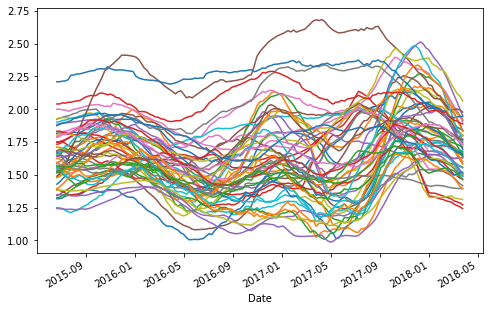

In [84]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Roland\Documents\datasets\avocado.csv")
df = df.copy()[df['type'] == 'organic']
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values(by = 'Date', ascending = True, inplace =True)

graph_df = pd.DataFrame()

for region in df['region'].unique():
    region_df = df.copy()[df['region'] == region]
    region_df.set_index("Date", inplace = True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df["AveragePrice"].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])
graph_df = graph_df.dropna()
graph_df.plot(figsize=(8,5), legend = False)